In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import optimizers
from keras.callbacks import EarlyStopping,ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


# 1. 导入数据集及数据的预处理

## 1.1 导入数据集

In [2]:
df =  pd.read_csv('./data/dataset_wx_final.csv', index_col='date')
df

oneDayBefore  twoDayBefore  threeDayBefore  oneMonthBefore  \
date                                                                     
2015-01-01          2.36          2.33            2.35            2.45   
2015-01-02          2.49          2.36            2.33            2.42   
2015-01-03          2.52          2.49            2.36            2.36   
2015-01-04          2.53          2.52            2.49            2.29   
2015-01-05          2.25          2.53            2.52            2.36   
2015-01-06          2.31          2.25            2.53            2.41   
2015-01-07          2.28          2.31            2.25            2.38   
2015-01-08          2.24          2.28            2.31            2.45   
2015-01-09          2.28          2.24            2.28            2.30   
2015-01-10          2.28          2.28            2.24            2.24   
2015-01-11          2.33          2.28            2.28            2.32   
2015-01-12          2.52          2.33            2.28            2.42   
2015-01-13          2.58          2.52            2.33            2.27   
2015-01-14          2.39          2.58            2.52            2.34   
2015-01-15          2.42          2.39            2.58            2.45   
2015-01-16          2.34          2.42            2.39            2.36   
2015-01-17          2.44          2.34            2.42            2.31   
2015-01-18          2.45          2.44            2.34            2.35   
2015-01-19          2.46          2.45            2.44            2.38   
2015-01-20          2.52          2.46            2.45            2.26   
2015-01-21          2.38          2.52            2.46            2.30   
2015-01-22          2.44          2.38            2.52            2.45   
2015-01-23          2.52          2.44            2.38            2.27   
2015-01-24          2.58          2.52            2.44            2.28   
2015-01-25          2.45          2.58            2.52            2.34   
2015-01-26          2.53          2.45            2.58            2.34   
2015-01-27          2.48          2.53            2.45            2.45   
2015-01-28          2.47          2.48            2.53            2.35   
2015-01-29          2.50          2.47            2.48            2.35   
2015-01-30          2.44          2.50            2.47            2.33   
...                  ...           ...             ...             ...   
2018-12-02          2.13          2.11            2.13            2.09   
2018-12-03          2.19          2.13            2.11            2.11   
2018-12-04          2.13          2.19            2.13            2.12   
2018-12-05          2.18          2.13            2.19            2.08   
2018-12-06          2.14          2.18            2.13            2.10   
2018-12-07          2.18          2.14            2.18            2.07   
2018-12-08          2.20          2.18            2.14            2.10   
2018-12-09          2.30          2.20            2.18            2.05   
2018-12-10          2.33          2.30            2.20            2.12   
2018-12-11          2.22          2.33            2.30            1.95   
2018-12-12          2.22          2.22            2.33            2.01   
2018-12-13          2.13          2.22            2.22            2.07   
2018-12-14          2.18          2.13            2.22            2.10   
2018-12-15          2.20          2.18            2.13            2.12   
2018-12-16          2.16          2.20            2.18            2.16   
2018-12-17          2.21          2.16            2.20            2.19   
2018-12-18          2.20          2.21            2.16            2.24   
2018-12-19          2.16          2.20            2.21            2.14   
2018-12-20          2.16          2.16            2.20            2.17   
2018-12-21          2.13          2.16            2.16            2.17   
2018-12-22          2.17          2.13            2.16            2.15   
2018-12-23      

## 1.2 补全缺值

In [5]:
df = df.fillna(method='bfill')
df = df.fillna(df.mean())
df.to_csv('./data/dataset_wx_web.csv')
df

oneDayBefore  twoDayBefore  threeDayBefore  oneMonthBefore  \
date                                                                     
2015-01-01          2.36          2.33        2.350000        2.450000   
2015-01-02          2.49          2.36        2.330000        2.420000   
2015-01-03          2.52          2.49        2.360000        2.360000   
2015-01-04          2.53          2.52        2.490000        2.290000   
2015-01-05          2.25          2.53        2.520000        2.360000   
2015-01-06          2.31          2.25        2.530000        2.410000   
2015-01-07          2.28          2.31        2.250000        2.380000   
2015-01-08          2.24          2.28        2.310000        2.450000   
2015-01-09          2.28          2.24        2.280000        2.300000   
2015-01-10          2.28          2.28        2.240000        2.240000   
2015-01-11          2.33          2.28        2.280000        2.320000   
2015-01-12          2.52          2.33        2.280000        2.420000   
2015-01-13          2.58          2.52        2.330000        2.270000   
2015-01-14          2.39          2.58        2.520000        2.340000   
2015-01-15          2.42          2.39        2.580000        2.450000   
2015-01-16          2.34          2.42        2.390000        2.360000   
2015-01-17          2.44          2.34        2.420000        2.310000   
2015-01-18          2.45          2.44        2.340000        2.350000   
2015-01-19          2.46          2.45        2.440000        2.380000   
2015-01-20          2.52          2.46        2.450000        2.260000   
2015-01-21          2.38          2.52        2.460000        2.300000   
2015-01-22          2.44          2.38        2.520000        2.450000   
2015-01-23          2.52          2.44        2.380000        2.270000   
2015-01-24          2.58          2.52        2.440000        2.280000   
2015-01-25          2.45          2.58        2.520000        2.340000   
2015-01-26          2.53          2.45        2.580000        2.340000   
2015-01-27          2.48          2.53        2.450000        2.450000   
2015-01-28          2.47          2.48        2.530000        2.350000   
2015-01-29          2.50          2.47        2.480000        2.350000   
2015-01-30          2.44          2.50        2.470000        2.330000   
...                  ...           ...             ...             ...   
2018-12-02          2.13          2.11        2.130000        2.090000   
2018-12-03          2.19          2.13        2.110000        2.110000   
2018-12-04          2.13          2.19        2.130000        2.120000   
2018-12-05          2.18          2.13        2.190000        2.080000   
2018-12-06          2.14          2.18        2.130000        2.100000   
2018-12-07          2.18          2.14        2.180000        2.070000   
2018-12-08          2.20          2.18        2.140000        2.100000   
2018-12-09          2.30          2.20        2.180000        2.050000   
2018-12-10          2.33          2.30        2.200000        2.120000   
2018-12-11          2.22          2.33        2.300000        1.950000   
2018-12-12          2.22          2.22        2.330000        2.010000   
2018-12-13          2.13          2.22        2.220000        2.070000   
2018-12-14          2.18          2.13        2.220000        2.100000   
2018-12-15          2.20          2.18        2.130000        2.120000   
2018-12-16          2.16          2.20        2.180000        2.160000   
2018-12-17          2.21          2.16        2.200000        2.190000   
2018-12-18          2.20          2.21        2.160000        2.240000   
2018-12-19          2.16          2.20        2.210000        2.140000   
2018-12-20          2.16          2.16        2.200000        2.170000   
2018-12-21          2.13          2.16        2.160000        2.170000   
2018-12-22          2.17          2.13        2.160000        2.150000   
2018-12-23      

## 1.3 拆分数据集

In [4]:
X_data = df.iloc[:,0:-1]
X_data

oneDayBefore  twoDayBefore  threeDayBefore  oneMonthBefore  \
date                                                                     
2015-01-01          2.36          2.33        2.350000        2.450000   
2015-01-02          2.49          2.36        2.330000        2.420000   
2015-01-03          2.52          2.49        2.360000        2.360000   
2015-01-04          2.53          2.52        2.490000        2.290000   
2015-01-05          2.25          2.53        2.520000        2.360000   
2015-01-06          2.31          2.25        2.530000        2.410000   
2015-01-07          2.28          2.31        2.250000        2.380000   
2015-01-08          2.24          2.28        2.310000        2.450000   
2015-01-09          2.28          2.24        2.280000        2.300000   
2015-01-10          2.28          2.28        2.240000        2.240000   
2015-01-11          2.33          2.28        2.280000        2.320000   
2015-01-12          2.52          2.33        2.280000        2.420000   
2015-01-13          2.58          2.52        2.330000        2.270000   
2015-01-14          2.39          2.58        2.520000        2.340000   
2015-01-15          2.42          2.39        2.580000        2.450000   
2015-01-16          2.34          2.42        2.390000        2.360000   
2015-01-17          2.44          2.34        2.420000        2.310000   
2015-01-18          2.45          2.44        2.340000        2.350000   
2015-01-19          2.46          2.45        2.440000        2.380000   
2015-01-20          2.52          2.46        2.450000        2.260000   
2015-01-21          2.38          2.52        2.460000        2.300000   
2015-01-22          2.44          2.38        2.520000        2.450000   
2015-01-23          2.52          2.44        2.380000        2.270000   
2015-01-24          2.58          2.52        2.440000        2.280000   
2015-01-25          2.45          2.58        2.520000        2.340000   
2015-01-26          2.53          2.45        2.580000        2.340000   
2015-01-27          2.48          2.53        2.450000        2.450000   
2015-01-28          2.47          2.48        2.530000        2.350000   
2015-01-29          2.50          2.47        2.480000        2.350000   
2015-01-30          2.44          2.50        2.470000        2.330000   
...                  ...           ...             ...             ...   
2018-12-02          2.13          2.11        2.130000        2.090000   
2018-12-03          2.19          2.13        2.110000        2.110000   
2018-12-04          2.13          2.19        2.130000        2.120000   
2018-12-05          2.18          2.13        2.190000        2.080000   
2018-12-06          2.14          2.18        2.130000        2.100000   
2018-12-07          2.18          2.14        2.180000        2.070000   
2018-12-08          2.20          2.18        2.140000        2.100000   
2018-12-09          2.30          2.20        2.180000        2.050000   
2018-12-10          2.33          2.30        2.200000        2.120000   
2018-12-11          2.22          2.33        2.300000        1.950000   
2018-12-12          2.22          2.22        2.330000        2.010000   
2018-12-13          2.13          2.22        2.220000        2.070000   
2018-12-14          2.18          2.13        2.220000        2.100000   
2018-12-15          2.20          2.18        2.130000        2.120000   
2018-12-16          2.16          2.20        2.180000        2.160000   
2018-12-17          2.21          2.16        2.200000        2.190000   
2018-12-18          2.20          2.21        2.160000        2.240000   
2018-12-19          2.16          2.20        2.210000        2.140000   
2018-12-20          2.16          2.16        2.200000        2.170000   
2018-12-21          2.13          2.16        2.160000        2.170000   
2018-12-22          2.17          2.13        2.160000        2.150000   
2018-12-23      

In [5]:
Y_data = df['price'].values.reshape(-1, 1)
Y_data

array([[2.49],
       [2.52],
       [2.53],
       ...,
       [2.17],
       [2.27],
       [2.18]])

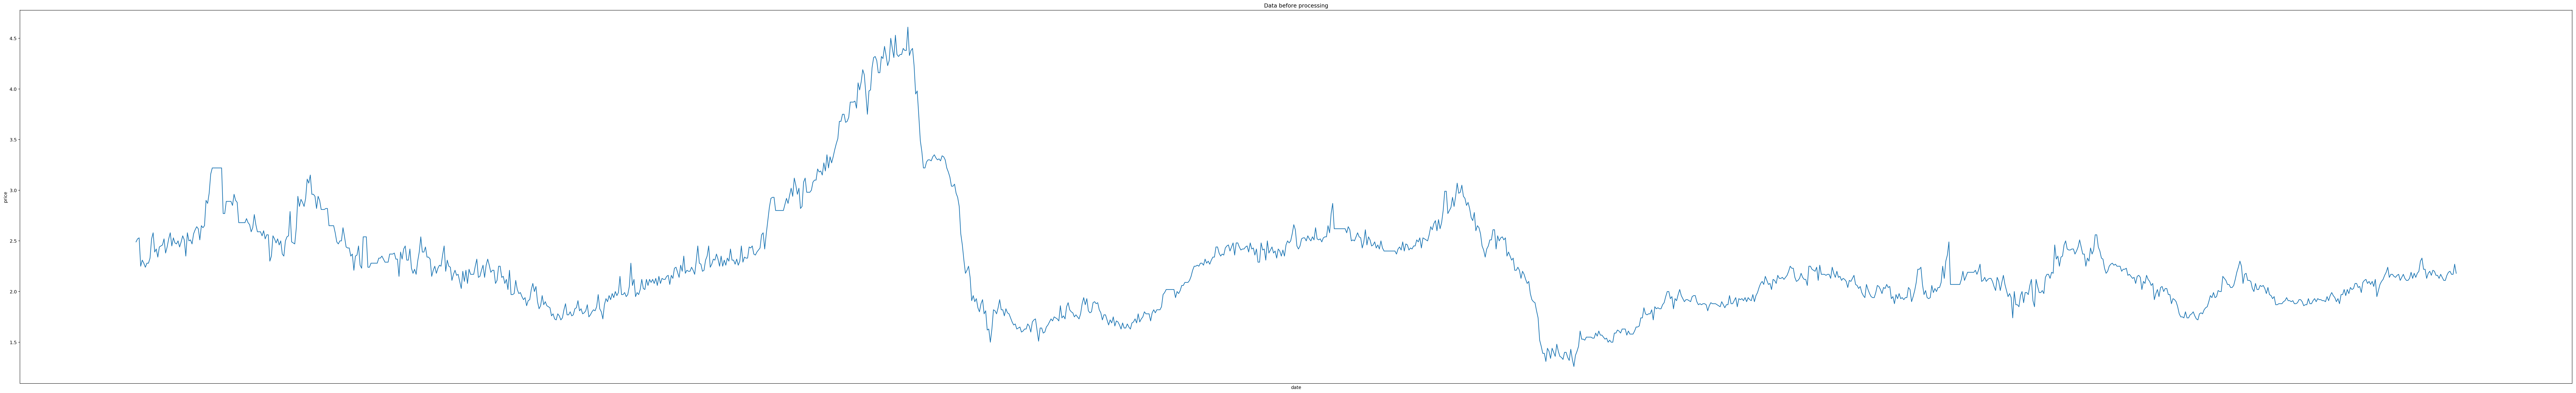

In [6]:
%matplotlib inline
plt.figure(figsize=(100, 15),dpi = 180)
plt.plot(range(len(X_data)), Y_data)
plt.xlabel('date')
plt.xticks([])
plt.ylabel('price')
plt.title('Data before processing')
plt.show()

## 1.4 归一化

In [7]:
scaler_X = preprocessing.StandardScaler(
    copy=True, with_mean=True, with_std=True).fit(X_data)
scaler_X

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaler_Y =  preprocessing.StandardScaler(
    copy=True, with_mean=True, with_std=True).fit(Y_data)
scaler_Y

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
X = scaler_X.transform(X_data)
X

array([[ 1.81065062e-01,  1.23936988e-01,  1.61617372e-01,
         3.44796909e-01,  8.06775010e-01, -1.67406961e+00],
       [ 4.28925741e-01,  1.81132777e-01,  1.23543189e-01,
         2.87690360e-01,  8.06775010e-01, -1.67603542e+00],
       [ 4.86124359e-01,  4.28981197e-01,  1.80654463e-01,
         1.73477261e-01,  8.06775010e-01, -1.67603542e+00],
       ...,
       [-1.81192852e-01, -1.23911431e-01, -1.42976089e-01,
        -2.64339615e-01, -7.37298597e-01,  1.17399293e+00],
       [-1.81192852e-01, -1.81107221e-01, -1.23938998e-01,
        -3.02410648e-01, -6.51516730e-01,  1.16409824e+00],
       [ 9.46920822e-03, -1.81107221e-01, -8.45416684e-16,
        -2.53604023e-15, -5.31422116e-01,  1.16409824e+00]])

In [10]:
Y = scaler_Y.transform(Y_data)
Y

array([[ 0.4298441 ],
       [ 0.48704079],
       [ 0.50610636],
       ...,
       [-0.18025391],
       [ 0.01040172],
       [-0.16118834]])

## 1.5 拆分测试集、训练集

In [11]:
X_train = X[:1342]
y_train = Y[:1342]
X_test = X[1342:]
y_test = Y[1342:]
# X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=0)

In [12]:
X_train.shape

(1342, 6)

In [13]:
X_test.shape

(150, 6)

In [14]:
y_train.shape

(1342, 1)

In [15]:
y_test.shape

(150, 1)

## 1.6 绘制数据图表

### 1.6.1 总数据图表

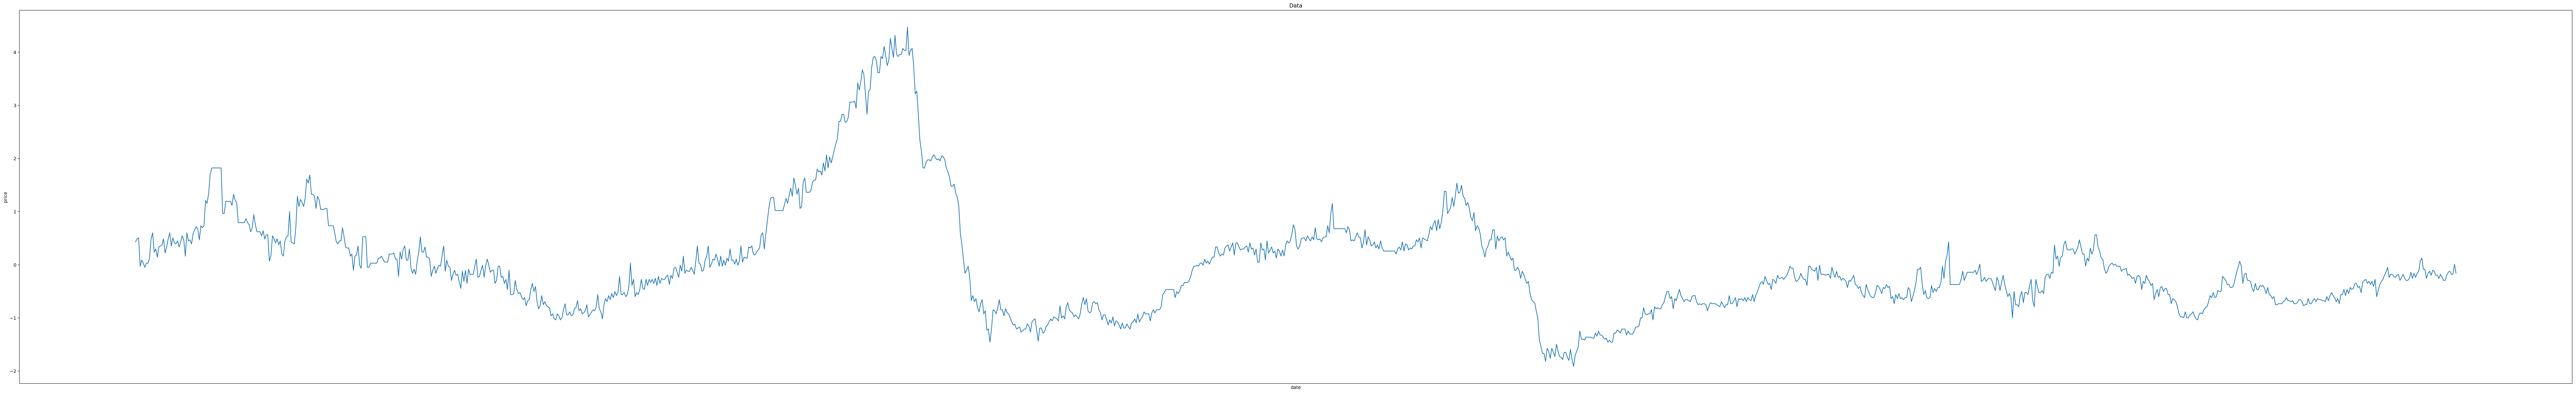

In [16]:
%matplotlib inline
plt.figure(figsize=(100, 15),dpi = 180)
plt.plot(range(len(X)), Y)
plt.xlabel('date')
plt.xticks([])
plt.ylabel('price')
plt.title('Data')
plt.show()

### 1.6.2 训练集

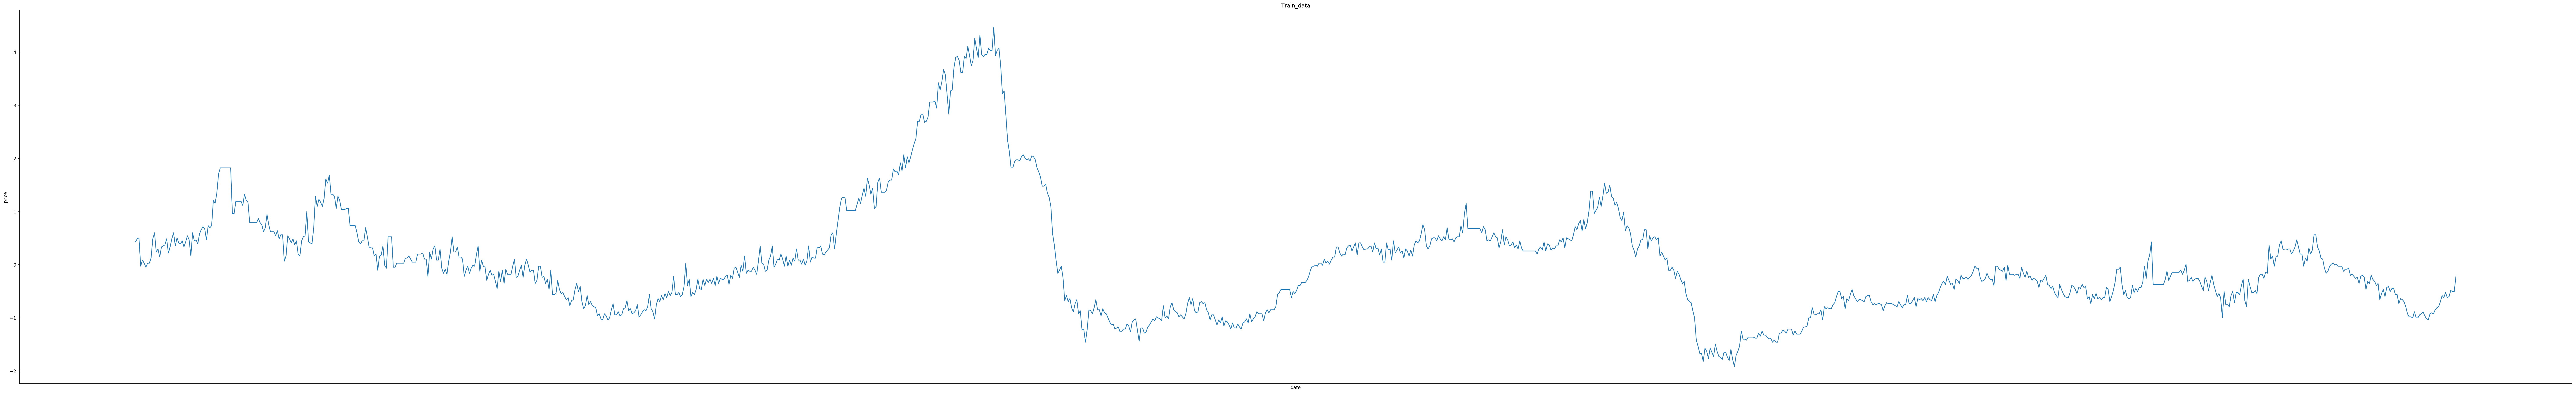

In [17]:
%matplotlib inline
plt.figure(figsize=(100, 15),dpi = 150)
plt.plot(range(len(X_train)), y_train)
plt.xlabel('date')
plt.xticks([])
plt.ylabel('price')
plt.title('Train_data')
plt.show()

### 1.6.3 测试集

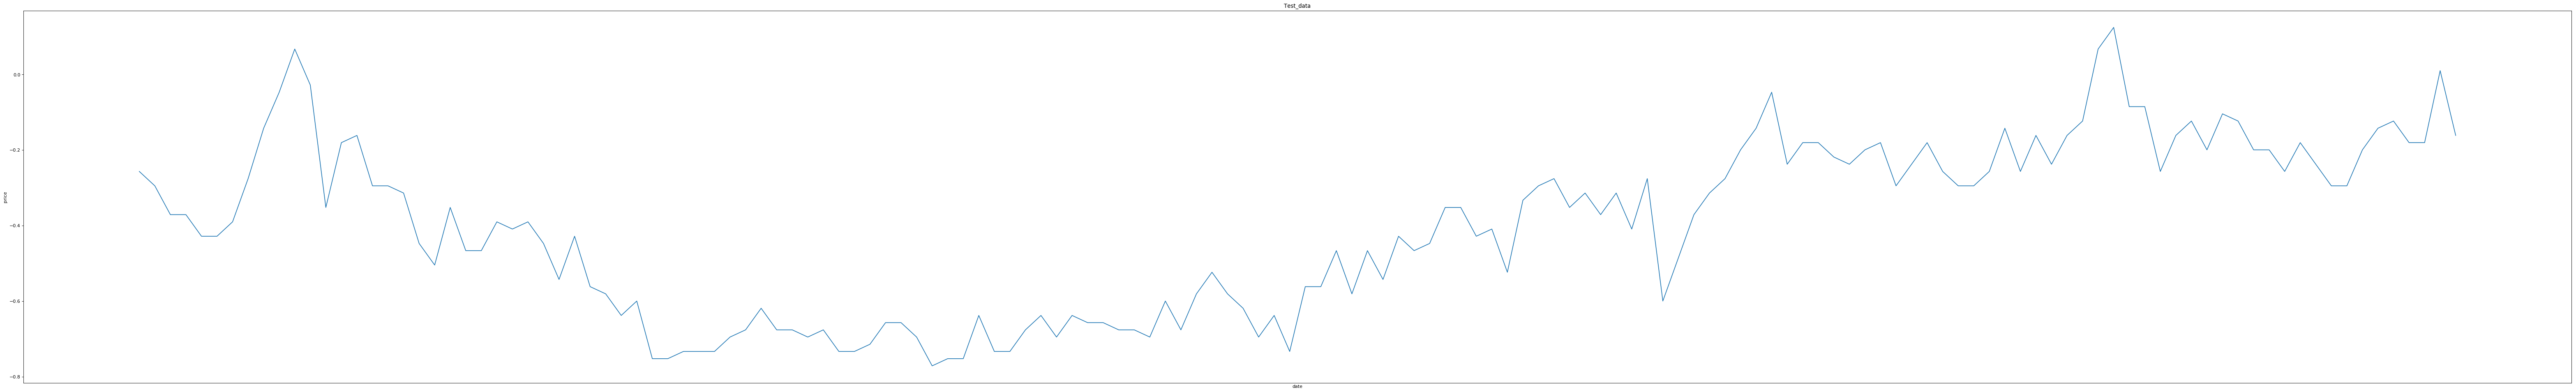

In [18]:
%matplotlib inline
plt.figure(figsize=(100, 15),dpi = 80)
plt.plot(range(len(X_test)), y_test)
plt.xlabel('date')
plt.xticks([])
plt.ylabel('price')
plt.title('Test_data')
plt.show()

# 2. 模型的选择与训练

## 2.1 第一个模型

### 2.1.1 第一个模型的定义

In [64]:
def build_network_1():
    network = Sequential()
    network.add(Dense(15, activation='relu', input_dim=X_train.shape[1]))
    network.add(Dense(15, activation='relu'))
    network.add(Dense(1))
    network.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
    return network

In [65]:
model = build_network_1()
print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 15)                105       
_________________________________________________________________
dense_11 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 16        
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________
None


### 2.1.2 模型的训练

In [66]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    shuffle=True,
    batch_size=50,
    verbose=1,
    validation_split=0.1)

Train on 1207 samples, validate on 135 samples
Epoch 1/50
1207/1207 [==============================] - 0s 271us/step - loss: 1.6153 - mean_absolute_error: 0.7839 - mean_squared_error: 1.6153 - val_loss: 0.0767 - val_mean_absolute_error: 0.2305 - val_mean_squared_error: 0.0767
Epoch 2/50
1207/1207 [==============================] - 0s 21us/step - loss: 0.7468 - mean_absolute_error: 0.5175 - mean_squared_error: 0.7468 - val_loss: 0.0733 - val_mean_absolute_error: 0.2288 - val_mean_squared_error: 0.0733
Epoch 3/50
1207/1207 [==============================] - 0s 21us/step - loss: 0.3109 - mean_absolute_error: 0.3543 - mean_squared_error: 0.3109 - val_loss: 0.0637 - val_mean_absolute_error: 0.2070 - val_mean_squared_error: 0.0637
Epoch 4/50
1207/1207 [==============================] - 0s 25us/step - loss: 0.1272 - mean_absolute_error: 0.2548 - mean_squared_error: 0.1272 - val_loss: 0.0490 - val_mean_absolute_error: 0.1805 - val_mean_squared_error: 0.0490
Epoch 5/50
1207/1207 [==============

### 2.1.3 模型分析

In [67]:
loss_history = history.history['loss']
mae_history = history.history['mean_absolute_error']
mse_history = history.history['mean_squared_error']

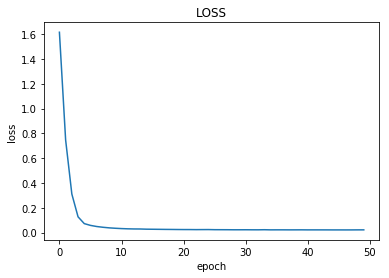

In [68]:
%matplotlib inline
plt.plot(range(len(loss_history)), loss_history)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('LOSS')
plt.show()

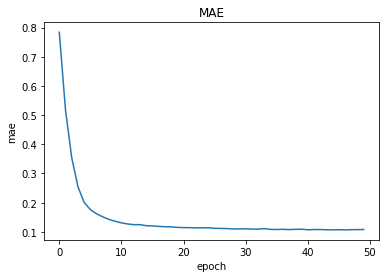

In [69]:
%matplotlib inline
plt.plot(range(len(mae_history)), mae_history)
plt.xlabel('epoch')
plt.ylabel('mae')
plt.title('MAE')
plt.show()

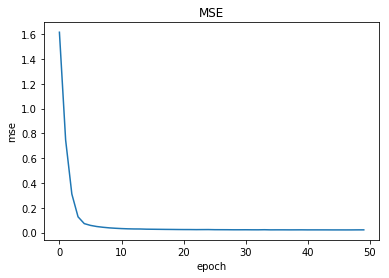

In [70]:
%matplotlib inline
plt.plot(range(len(mse_history)), mse_history)
plt.xlabel('epoch')
plt.ylabel('mse')
plt.title('MSE')
plt.show()

In [71]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

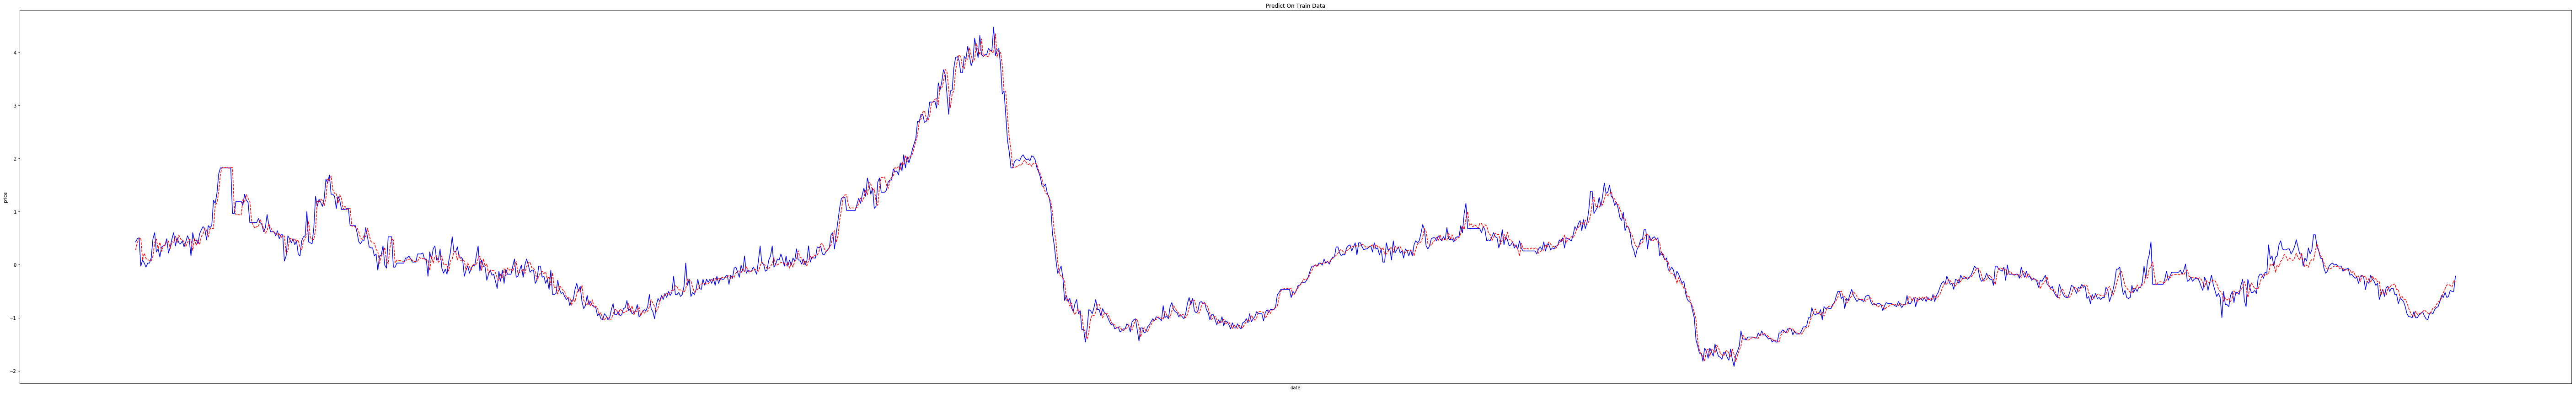

In [72]:
%matplotlib inline
plt.figure(figsize=(100, 15))
plt.plot(range(len(X_train)), y_train,'b')
plt.plot(range(len(X_train)), y_train_pred, 'r--')
plt.xlabel('date')
plt.xticks([])
plt.ylabel('price')
plt.title('Predict On Train Data')
plt.show()

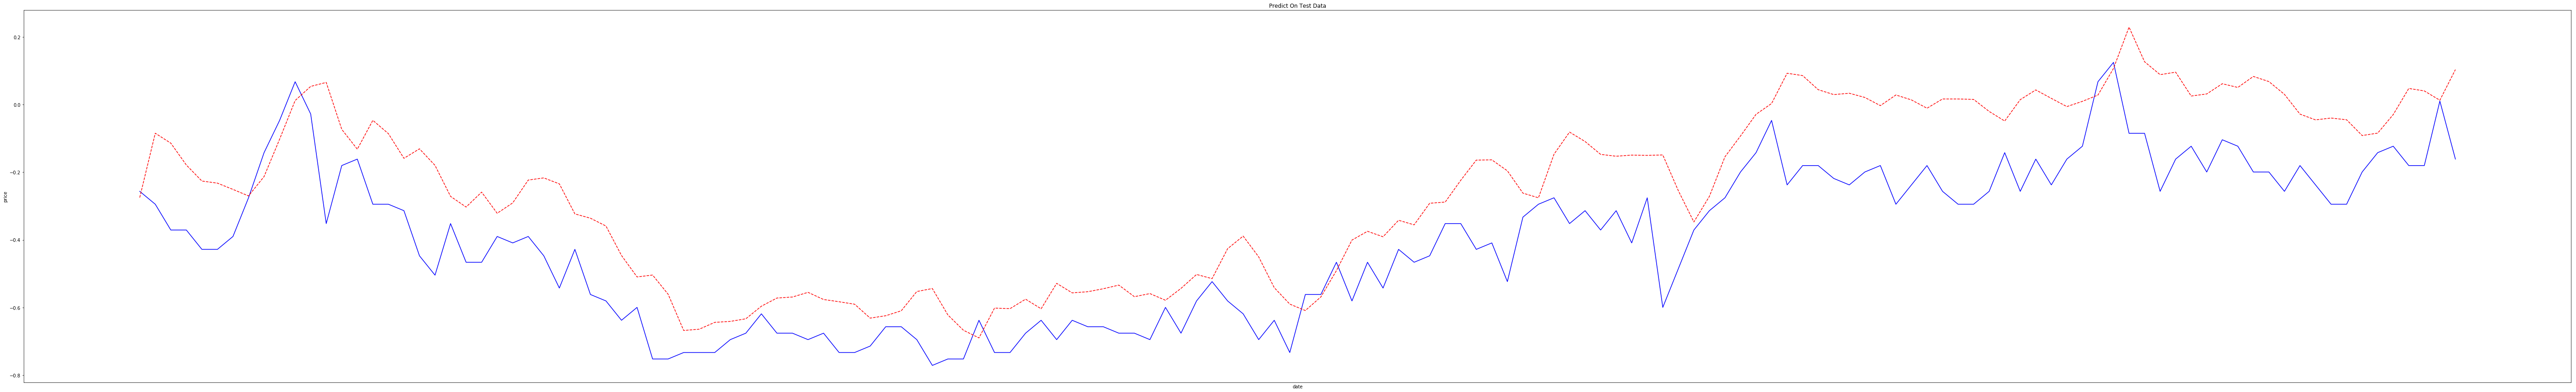

In [73]:
%matplotlib inline
plt.figure(figsize=(100, 15))
plt.plot(range(len(X_test)), y_test,'b')
plt.plot(range(len(X_test)), y_test_pred, 'r--')
plt.xlabel('date')
plt.xticks([])
plt.ylabel('price')
plt.title('Predict On Test Data')
plt.show()

### 尝试其他模型

## 2.2 第二个模型: 缩小神经网络

### 2.2.1 模型的定义

In [48]:
def build_network_2():
    network = Sequential()
    network.add(Dense(8, activation='relu', input_dim=X_train.shape[1]))
    network.add(Dense(8, activation='relu'))
    network.add(Dense(1))
    network.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
    return network

In [49]:
model = build_network_2()
print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 56        
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________
None


### 2.2.2 模型训练

In [57]:
best_weights_filepath = './model_data/nn2_best_weights.hdf5'
#early_stopping = EarlyStopping(monitor='val_loss', patience=100, verbose=2, mode='auto')
save_bestModel = ModelCheckpoint(
    best_weights_filepath,
    monitor='val_loss',
    verbose=2,
    save_best_only=True,
    mode='auto')

In [58]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=50,
    verbose=1,
    validation_split=0.1,
    shuffle=True,
    callbacks=[save_bestModel])

Train on 1207 samples, validate on 135 samples
Epoch 1/50
1207/1207 [==============================] - 0s 29us/step - loss: 0.4830 - mean_absolute_error: 0.3443 - mean_squared_error: 0.4830 - val_loss: 0.0686 - val_mean_absolute_error: 0.2188 - val_mean_squared_error: 0.0686

Epoch 00001: val_loss improved from inf to 0.06864, saving model to ./model_data_2/nn2_best_weights.hdf5
Epoch 2/50
1207/1207 [==============================] - 0s 26us/step - loss: 0.4777 - mean_absolute_error: 0.3419 - mean_squared_error: 0.4777 - val_loss: 0.0663 - val_mean_absolute_error: 0.2145 - val_mean_squared_error: 0.0663

Epoch 00002: val_loss improved from 0.06864 to 0.06632, saving model to ./model_data_2/nn2_best_weights.hdf5
Epoch 3/50
1207/1207 [==============================] - 0s 18us/step - loss: 0.4728 - mean_absolute_error: 0.3402 - mean_squared_error: 0.4728 - val_loss: 0.0677 - val_mean_absolute_error: 0.2167 - val_mean_squared_error: 0.0677

Epoch 00003: val_loss did not improve from 0.0663

### 2.2.3 模型的分析

In [59]:
loss_history = history.history['loss']
mae_history = history.history['mean_absolute_error']
mse_history = history.history['mean_squared_error']

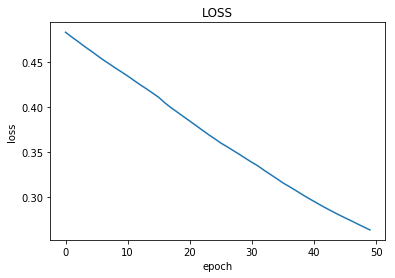

In [60]:
%matplotlib inline
plt.plot(range(len(loss_history)), loss_history)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('LOSS')
plt.show()

In [61]:
y_train_pred= model.predict(X_train)
y_test_pred = model.predict(X_test)

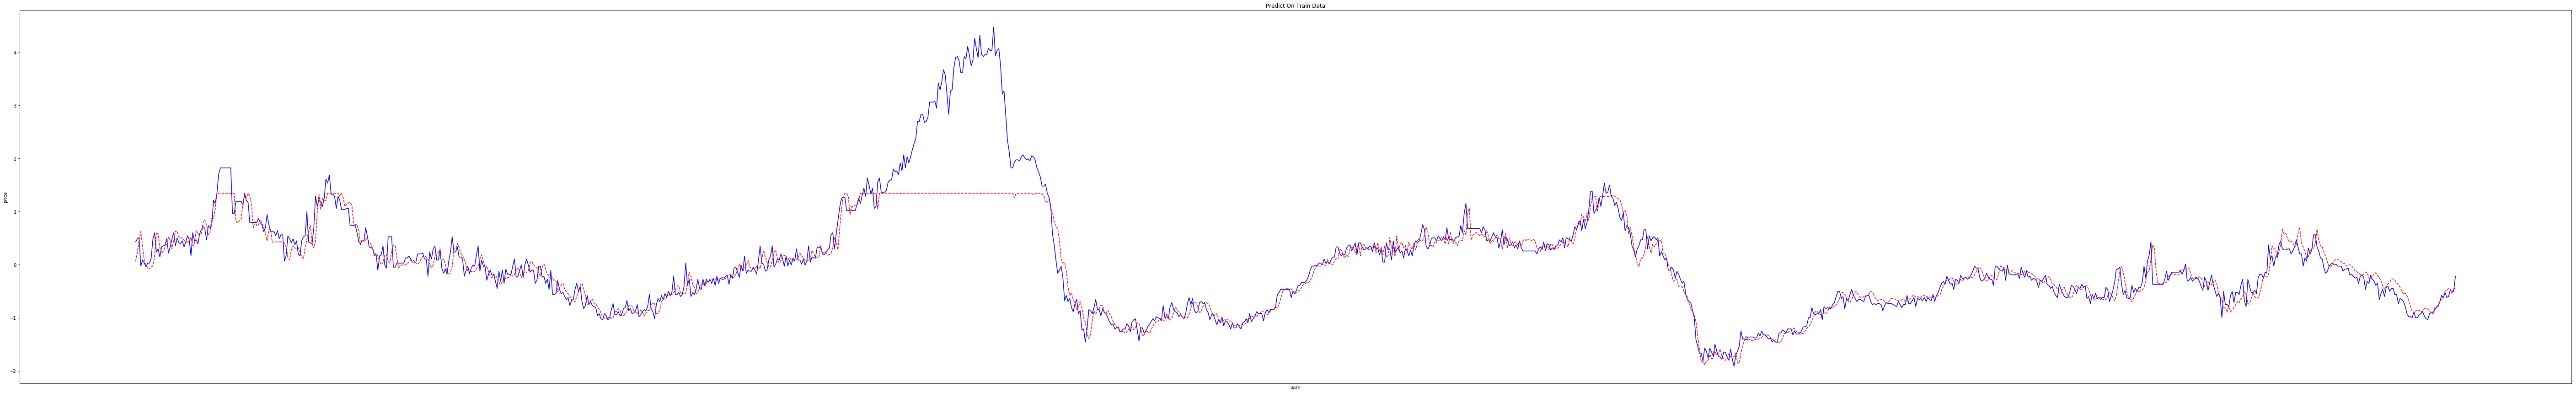

In [62]:
%matplotlib inline
plt.figure(figsize=(100, 15))
plt.plot(range(len(X_train)), y_train,'b')
plt.plot(range(len(X_train)), y_train_pred, 'r--')
plt.xlabel('date')
plt.xticks([])
plt.ylabel('price')
plt.title('Predict On Train Data')
plt.show()

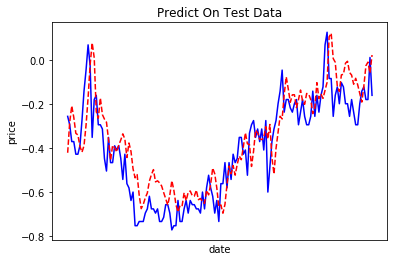

In [63]:
%matplotlib inline
plt.plot(range(len(X_test)), y_test,'b')
plt.plot(range(len(X_test)), y_test_pred, 'r--')
plt.xlabel('date')
plt.xticks([])
plt.ylabel('price')
plt.title('Predict On Test Data')
plt.show()

## 2.3 第三个模型: 带dropout的神经网络

### 2.3.1 模型定义

In [38]:
def build_network_3():
    network = Sequential()
    network.add(Dense(15, activation='relu', input_dim=X_train.shape[1]))
    network.add(Dropout(0.5))
    network.add(Dense(10, activation='relu'))
    network.add(Dropout(0.5))
    network.add(Dense(10, activation='relu'))
    network.add(Dropout(0.5))
    network.add(Dense(1))
    network.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
    return network

In [39]:
model = build_network_3()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 15)                105       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                160       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total para

### 2.3.2 模型训练

In [40]:
best_filepath = './model_data/nn3_best.hdf5'
#early_stopping = EarlyStopping(monitor='val_loss', patience=100, verbose=2, mode='auto')
save_bestModel = ModelCheckpoint(
    best_filepath,
    monitor='val_loss',
    verbose=2,
    save_best_only=True,
    mode='auto')

In [41]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=50,
    verbose=1,
    shuffle=True,
    validation_split=0.1,
    callbacks=[save_bestModel])

Train on 1207 samples, validate on 135 samples
Epoch 1/100
1207/1207 [==============================] - 0s 308us/step - loss: 1.7926 - mean_absolute_error: 0.9010 - mean_squared_error: 1.7926 - val_loss: 0.2316 - val_mean_absolute_error: 0.4015 - val_mean_squared_error: 0.2316

Epoch 00001: val_loss improved from inf to 0.23159, saving model to ./model_data_2/nn3_best.hdf5
Epoch 2/100
1207/1207 [==============================] - 0s 30us/step - loss: 1.3919 - mean_absolute_error: 0.8218 - mean_squared_error: 1.3919 - val_loss: 0.2246 - val_mean_absolute_error: 0.3957 - val_mean_squared_error: 0.2246

Epoch 00002: val_loss improved from 0.23159 to 0.22464, saving model to ./model_data_2/nn3_best.hdf5
Epoch 3/100
1207/1207 [==============================] - 0s 32us/step - loss: 1.3234 - mean_absolute_error: 0.8042 - mean_squared_error: 1.3234 - val_loss: 0.2360 - val_mean_absolute_error: 0.4049 - val_mean_squared_error: 0.2360

Epoch 00003: val_loss did not improve from 0.22464
Epoch 4/10


Epoch 00027: val_loss improved from 0.13028 to 0.11682, saving model to ./model_data_2/nn3_best.hdf5
Epoch 28/100
1207/1207 [==============================] - 0s 31us/step - loss: 0.7388 - mean_absolute_error: 0.5848 - mean_squared_error: 0.7388 - val_loss: 0.1168 - val_mean_absolute_error: 0.2759 - val_mean_squared_error: 0.1168

Epoch 00028: val_loss improved from 0.11682 to 0.11676, saving model to ./model_data_2/nn3_best.hdf5
Epoch 29/100
1207/1207 [==============================] - 0s 31us/step - loss: 0.7852 - mean_absolute_error: 0.5900 - mean_squared_error: 0.7852 - val_loss: 0.1188 - val_mean_absolute_error: 0.2788 - val_mean_squared_error: 0.1188

Epoch 00029: val_loss did not improve from 0.11676
Epoch 30/100
1207/1207 [==============================] - 0s 31us/step - loss: 0.7075 - mean_absolute_error: 0.5711 - mean_squared_error: 0.7075 - val_loss: 0.1173 - val_mean_absolute_error: 0.2775 - val_mean_squared_error: 0.1173

Epoch 00030: val_loss did not improve from 0.11676

1207/1207 [==============================] - 0s 31us/step - loss: 0.4872 - mean_absolute_error: 0.4746 - mean_squared_error: 0.4872 - val_loss: 0.0824 - val_mean_absolute_error: 0.2258 - val_mean_squared_error: 0.0824

Epoch 00082: val_loss did not improve from 0.07911
Epoch 83/100
1207/1207 [==============================] - 0s 28us/step - loss: 0.5428 - mean_absolute_error: 0.4900 - mean_squared_error: 0.5428 - val_loss: 0.0915 - val_mean_absolute_error: 0.2362 - val_mean_squared_error: 0.0915

Epoch 00083: val_loss did not improve from 0.07911
Epoch 84/100
1207/1207 [==============================] - 0s 32us/step - loss: 0.6186 - mean_absolute_error: 0.5011 - mean_squared_error: 0.6186 - val_loss: 0.0929 - val_mean_absolute_error: 0.2394 - val_mean_squared_error: 0.0929

Epoch 00084: val_loss did not improve from 0.07911
Epoch 85/100
1207/1207 [==============================] - 0s 30us/step - loss: 0.6162 - mean_absolute_error: 0.4934 - mean_squared_error: 0.6162 - val_loss: 0.0865 

### 2.3.3 模型分析

In [42]:
loss_history = history.history['loss']
mae_history = history.history['mean_absolute_error']
mse_history = history.history['mean_squared_error']

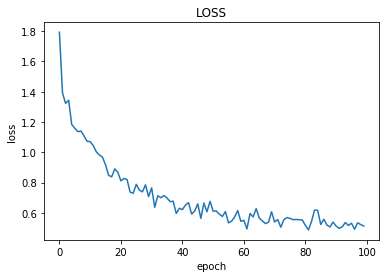

In [43]:
%matplotlib inline
plt.plot(range(len(loss_history)), loss_history)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('LOSS')
plt.show()

In [44]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

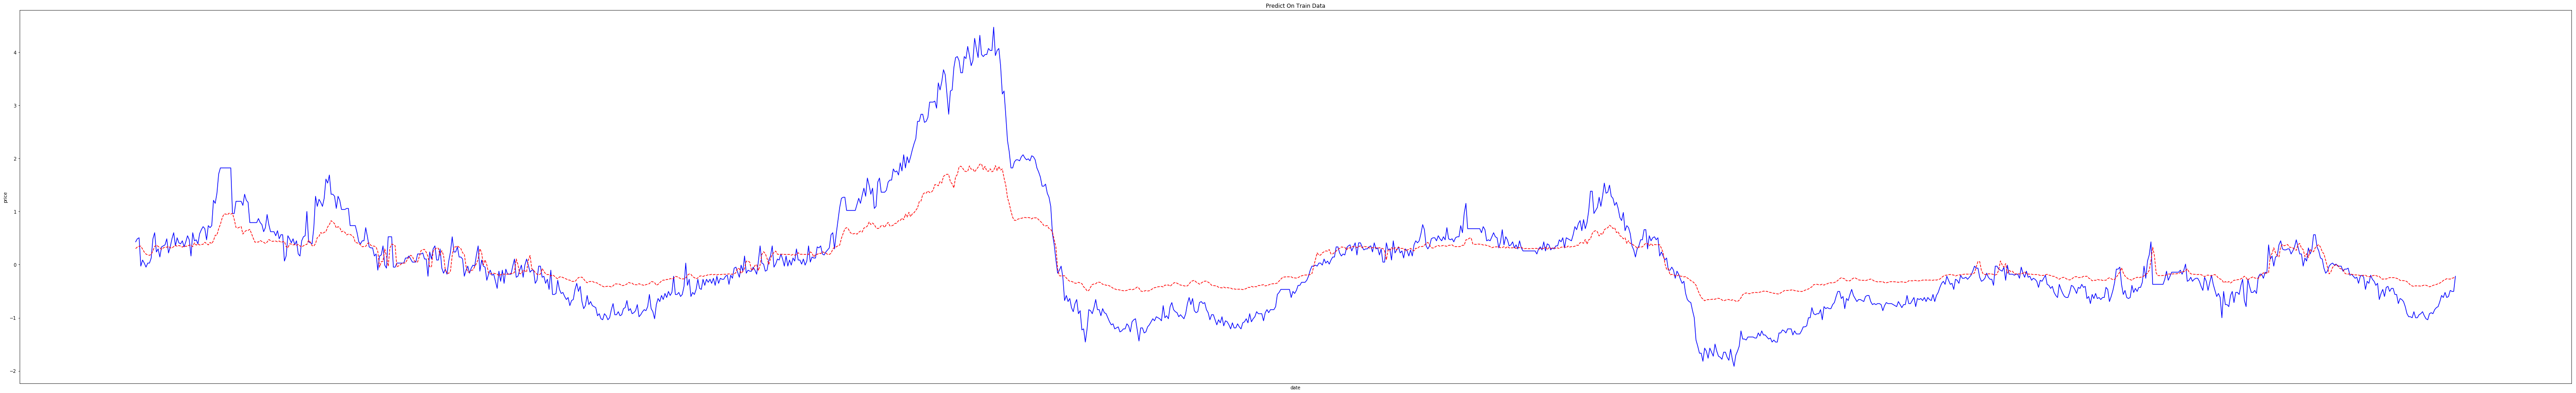

In [45]:
%matplotlib inline
plt.figure(figsize=(100, 15))
plt.plot(range(len(X_train)), y_train,'b')
plt.plot(range(len(X_train)), y_train_pred, 'r--')
plt.xlabel('date')
plt.xticks([])
plt.ylabel('price')
plt.title('Predict On Train Data')
plt.show()

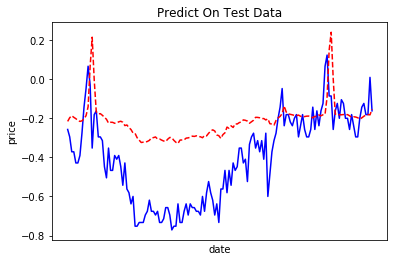

In [46]:
%matplotlib inline
plt.plot(range(len(X_test)), y_test,'b')
plt.plot(range(len(X_test)), y_test_pred, 'r--')
plt.xlabel('date')
plt.xticks([])
plt.ylabel('price')
plt.title('Predict On Test Data')
plt.show()

## 2.4 增加训练轮次

### 2.4.1 训练

In [47]:
best_filepath = './model_data/nn3_1_best.hdf5'
early_stopping = EarlyStopping(monitor='val_loss', patience=80, verbose=2, mode='auto')
save_bestModel = ModelCheckpoint(
    best_filepath,
    monitor='val_loss',
    verbose=2,
    save_best_only=True,
    mode='auto')

In [48]:
history = model.fit(
    X_train,
    y_train,
    epochs=500,
    shuffle=True,
    batch_size=50,
    verbose=1,
    validation_split=0.1,
    callbacks=[save_bestModel])

Train on 1207 samples, validate on 135 samples
Epoch 1/500
1207/1207 [==============================] - 0s 36us/step - loss: 0.4756 - mean_absolute_error: 0.4619 - mean_squared_error: 0.4756 - val_loss: 0.0715 - val_mean_absolute_error: 0.2092 - val_mean_squared_error: 0.0715

Epoch 00001: val_loss improved from inf to 0.07146, saving model to ./model_data_2/nn3_1_best.hdf5
Epoch 2/500
1207/1207 [==============================] - 0s 29us/step - loss: 0.5151 - mean_absolute_error: 0.4728 - mean_squared_error: 0.5151 - val_loss: 0.0714 - val_mean_absolute_error: 0.2105 - val_mean_squared_error: 0.0714

Epoch 00002: val_loss improved from 0.07146 to 0.07143, saving model to ./model_data_2/nn3_1_best.hdf5
Epoch 3/500
1207/1207 [==============================] - 0s 28us/step - loss: 0.5434 - mean_absolute_error: 0.4875 - mean_squared_error: 0.5434 - val_loss: 0.0712 - val_mean_absolute_error: 0.2070 - val_mean_squared_error: 0.0712

Epoch 00003: val_loss improved from 0.07143 to 0.07119, sa


Epoch 00028: val_loss did not improve from 0.06032
Epoch 29/500
1207/1207 [==============================] - 0s 28us/step - loss: 0.4833 - mean_absolute_error: 0.4572 - mean_squared_error: 0.4833 - val_loss: 0.0652 - val_mean_absolute_error: 0.2008 - val_mean_squared_error: 0.0652

Epoch 00029: val_loss did not improve from 0.06032
Epoch 30/500
1207/1207 [==============================] - 0s 22us/step - loss: 0.4882 - mean_absolute_error: 0.4540 - mean_squared_error: 0.4882 - val_loss: 0.0645 - val_mean_absolute_error: 0.1985 - val_mean_squared_error: 0.0645

Epoch 00030: val_loss did not improve from 0.06032
Epoch 31/500
1207/1207 [==============================] - 0s 26us/step - loss: 0.4987 - mean_absolute_error: 0.4609 - mean_squared_error: 0.4987 - val_loss: 0.0652 - val_mean_absolute_error: 0.2005 - val_mean_squared_error: 0.0652

Epoch 00031: val_loss did not improve from 0.06032
Epoch 32/500
1207/1207 [==============================] - 0s 31us/step - loss: 0.5053 - mean_absolu


Epoch 00085: val_loss did not improve from 0.05294
Epoch 86/500
1207/1207 [==============================] - 0s 35us/step - loss: 0.3926 - mean_absolute_error: 0.4323 - mean_squared_error: 0.3926 - val_loss: 0.0594 - val_mean_absolute_error: 0.1940 - val_mean_squared_error: 0.0594

Epoch 00086: val_loss did not improve from 0.05294
Epoch 87/500
1207/1207 [==============================] - 0s 31us/step - loss: 0.4448 - mean_absolute_error: 0.4366 - mean_squared_error: 0.4448 - val_loss: 0.0555 - val_mean_absolute_error: 0.1861 - val_mean_squared_error: 0.0555

Epoch 00087: val_loss did not improve from 0.05294
Epoch 88/500
1207/1207 [==============================] - 0s 36us/step - loss: 0.4554 - mean_absolute_error: 0.4438 - mean_squared_error: 0.4554 - val_loss: 0.0557 - val_mean_absolute_error: 0.1850 - val_mean_squared_error: 0.0557

Epoch 00088: val_loss did not improve from 0.05294
Epoch 89/500
1207/1207 [==============================] - 0s 29us/step - loss: 0.4839 - mean_absolu


Epoch 00114: val_loss did not improve from 0.05294
Epoch 115/500
1207/1207 [==============================] - 0s 30us/step - loss: 0.4681 - mean_absolute_error: 0.4428 - mean_squared_error: 0.4681 - val_loss: 0.0690 - val_mean_absolute_error: 0.2111 - val_mean_squared_error: 0.0690

Epoch 00115: val_loss did not improve from 0.05294
Epoch 116/500
1207/1207 [==============================] - 0s 28us/step - loss: 0.4560 - mean_absolute_error: 0.4460 - mean_squared_error: 0.4560 - val_loss: 0.0565 - val_mean_absolute_error: 0.1882 - val_mean_squared_error: 0.0565

Epoch 00116: val_loss did not improve from 0.05294
Epoch 117/500
1207/1207 [==============================] - 0s 26us/step - loss: 0.4949 - mean_absolute_error: 0.4634 - mean_squared_error: 0.4949 - val_loss: 0.0499 - val_mean_absolute_error: 0.1759 - val_mean_squared_error: 0.0499

Epoch 00117: val_loss improved from 0.05294 to 0.04993, saving model to ./model_data_2/nn3_1_best.hdf5
Epoch 118/500
1207/1207 [===================

1207/1207 [==============================] - 0s 31us/step - loss: 0.4321 - mean_absolute_error: 0.4282 - mean_squared_error: 0.4321 - val_loss: 0.0597 - val_mean_absolute_error: 0.1942 - val_mean_squared_error: 0.0597

Epoch 00172: val_loss did not improve from 0.04927
Epoch 173/500
1207/1207 [==============================] - 0s 32us/step - loss: 0.4920 - mean_absolute_error: 0.4486 - mean_squared_error: 0.4920 - val_loss: 0.0565 - val_mean_absolute_error: 0.1858 - val_mean_squared_error: 0.0565

Epoch 00173: val_loss did not improve from 0.04927
Epoch 174/500
1207/1207 [==============================] - 0s 35us/step - loss: 0.4827 - mean_absolute_error: 0.4468 - mean_squared_error: 0.4827 - val_loss: 0.0591 - val_mean_absolute_error: 0.1878 - val_mean_squared_error: 0.0591

Epoch 00174: val_loss did not improve from 0.04927
Epoch 175/500
1207/1207 [==============================] - 0s 34us/step - loss: 0.4431 - mean_absolute_error: 0.4357 - mean_squared_error: 0.4431 - val_loss: 0.06


Epoch 00200: val_loss did not improve from 0.04925
Epoch 201/500
1207/1207 [==============================] - 0s 29us/step - loss: 0.4439 - mean_absolute_error: 0.4276 - mean_squared_error: 0.4439 - val_loss: 0.0685 - val_mean_absolute_error: 0.2078 - val_mean_squared_error: 0.0685

Epoch 00201: val_loss did not improve from 0.04925
Epoch 202/500
1207/1207 [==============================] - 0s 30us/step - loss: 0.4254 - mean_absolute_error: 0.4325 - mean_squared_error: 0.4254 - val_loss: 0.0593 - val_mean_absolute_error: 0.1925 - val_mean_squared_error: 0.0593

Epoch 00202: val_loss did not improve from 0.04925
Epoch 203/500
1207/1207 [==============================] - 0s 26us/step - loss: 0.4711 - mean_absolute_error: 0.4452 - mean_squared_error: 0.4711 - val_loss: 0.0644 - val_mean_absolute_error: 0.1993 - val_mean_squared_error: 0.0644

Epoch 00203: val_loss did not improve from 0.04925
Epoch 204/500
1207/1207 [==============================] - 0s 32us/step - loss: 0.4502 - mean_ab


Epoch 00229: val_loss did not improve from 0.04925
Epoch 230/500
1207/1207 [==============================] - 0s 30us/step - loss: 0.4569 - mean_absolute_error: 0.4399 - mean_squared_error: 0.4569 - val_loss: 0.0585 - val_mean_absolute_error: 0.1884 - val_mean_squared_error: 0.0585

Epoch 00230: val_loss did not improve from 0.04925
Epoch 231/500
1207/1207 [==============================] - 0s 29us/step - loss: 0.4880 - mean_absolute_error: 0.4464 - mean_squared_error: 0.4880 - val_loss: 0.0646 - val_mean_absolute_error: 0.1974 - val_mean_squared_error: 0.0646

Epoch 00231: val_loss did not improve from 0.04925
Epoch 232/500
1207/1207 [==============================] - 0s 28us/step - loss: 0.4790 - mean_absolute_error: 0.4445 - mean_squared_error: 0.4790 - val_loss: 0.0532 - val_mean_absolute_error: 0.1793 - val_mean_squared_error: 0.0532

Epoch 00232: val_loss did not improve from 0.04925
Epoch 233/500
1207/1207 [==============================] - 0s 27us/step - loss: 0.4524 - mean_ab

1207/1207 [==============================] - 0s 31us/step - loss: 0.4172 - mean_absolute_error: 0.4208 - mean_squared_error: 0.4172 - val_loss: 0.0553 - val_mean_absolute_error: 0.1842 - val_mean_squared_error: 0.0553

Epoch 00287: val_loss did not improve from 0.04800
Epoch 288/500
1207/1207 [==============================] - 0s 31us/step - loss: 0.4915 - mean_absolute_error: 0.4513 - mean_squared_error: 0.4915 - val_loss: 0.0565 - val_mean_absolute_error: 0.1873 - val_mean_squared_error: 0.0565

Epoch 00288: val_loss did not improve from 0.04800
Epoch 289/500
1207/1207 [==============================] - 0s 31us/step - loss: 0.4450 - mean_absolute_error: 0.4309 - mean_squared_error: 0.4450 - val_loss: 0.0572 - val_mean_absolute_error: 0.1895 - val_mean_squared_error: 0.0572

Epoch 00289: val_loss did not improve from 0.04800
Epoch 290/500
1207/1207 [==============================] - 0s 35us/step - loss: 0.4429 - mean_absolute_error: 0.4344 - mean_squared_error: 0.4429 - val_loss: 0.06

1207/1207 [==============================] - 0s 32us/step - loss: 0.4348 - mean_absolute_error: 0.4387 - mean_squared_error: 0.4348 - val_loss: 0.0645 - val_mean_absolute_error: 0.2029 - val_mean_squared_error: 0.0645

Epoch 00316: val_loss did not improve from 0.04800
Epoch 317/500
1207/1207 [==============================] - 0s 29us/step - loss: 0.3967 - mean_absolute_error: 0.4212 - mean_squared_error: 0.3967 - val_loss: 0.0538 - val_mean_absolute_error: 0.1780 - val_mean_squared_error: 0.0538

Epoch 00317: val_loss did not improve from 0.04800
Epoch 318/500
1207/1207 [==============================] - 0s 28us/step - loss: 0.3570 - mean_absolute_error: 0.4049 - mean_squared_error: 0.3570 - val_loss: 0.0545 - val_mean_absolute_error: 0.1824 - val_mean_squared_error: 0.0545

Epoch 00318: val_loss did not improve from 0.04800
Epoch 319/500
1207/1207 [==============================] - 0s 29us/step - loss: 0.3816 - mean_absolute_error: 0.4081 - mean_squared_error: 0.3816 - val_loss: 0.05

1207/1207 [==============================] - 0s 28us/step - loss: 0.4151 - mean_absolute_error: 0.4191 - mean_squared_error: 0.4151 - val_loss: 0.0578 - val_mean_absolute_error: 0.1933 - val_mean_squared_error: 0.0578

Epoch 00345: val_loss did not improve from 0.04800
Epoch 346/500
1207/1207 [==============================] - 0s 27us/step - loss: 0.4307 - mean_absolute_error: 0.4259 - mean_squared_error: 0.4307 - val_loss: 0.0521 - val_mean_absolute_error: 0.1815 - val_mean_squared_error: 0.0521

Epoch 00346: val_loss did not improve from 0.04800
Epoch 347/500
1207/1207 [==============================] - 0s 26us/step - loss: 0.4078 - mean_absolute_error: 0.4284 - mean_squared_error: 0.4078 - val_loss: 0.0578 - val_mean_absolute_error: 0.1932 - val_mean_squared_error: 0.0578

Epoch 00347: val_loss did not improve from 0.04800
Epoch 348/500
1207/1207 [==============================] - 0s 31us/step - loss: 0.4160 - mean_absolute_error: 0.4262 - mean_squared_error: 0.4160 - val_loss: 0.05

1207/1207 [==============================] - 0s 30us/step - loss: 0.4008 - mean_absolute_error: 0.4104 - mean_squared_error: 0.4008 - val_loss: 0.0624 - val_mean_absolute_error: 0.1991 - val_mean_squared_error: 0.0624

Epoch 00374: val_loss did not improve from 0.04800
Epoch 375/500
1207/1207 [==============================] - 0s 30us/step - loss: 0.4488 - mean_absolute_error: 0.4388 - mean_squared_error: 0.4488 - val_loss: 0.0542 - val_mean_absolute_error: 0.1833 - val_mean_squared_error: 0.0542

Epoch 00375: val_loss did not improve from 0.04800
Epoch 376/500
1207/1207 [==============================] - 0s 31us/step - loss: 0.4323 - mean_absolute_error: 0.4321 - mean_squared_error: 0.4323 - val_loss: 0.0556 - val_mean_absolute_error: 0.1900 - val_mean_squared_error: 0.0556

Epoch 00376: val_loss did not improve from 0.04800
Epoch 377/500
1207/1207 [==============================] - 0s 30us/step - loss: 0.3985 - mean_absolute_error: 0.4213 - mean_squared_error: 0.3985 - val_loss: 0.05


Epoch 00402: val_loss did not improve from 0.04726
Epoch 403/500
1207/1207 [==============================] - 0s 28us/step - loss: 0.4445 - mean_absolute_error: 0.4317 - mean_squared_error: 0.4445 - val_loss: 0.0515 - val_mean_absolute_error: 0.1783 - val_mean_squared_error: 0.0515

Epoch 00403: val_loss did not improve from 0.04726
Epoch 404/500
1207/1207 [==============================] - 0s 28us/step - loss: 0.4295 - mean_absolute_error: 0.4235 - mean_squared_error: 0.4295 - val_loss: 0.0596 - val_mean_absolute_error: 0.1923 - val_mean_squared_error: 0.0596

Epoch 00404: val_loss did not improve from 0.04726
Epoch 405/500
1207/1207 [==============================] - 0s 31us/step - loss: 0.4486 - mean_absolute_error: 0.4363 - mean_squared_error: 0.4486 - val_loss: 0.0572 - val_mean_absolute_error: 0.1882 - val_mean_squared_error: 0.0572

Epoch 00405: val_loss did not improve from 0.04726
Epoch 406/500
1207/1207 [==============================] - 0s 30us/step - loss: 0.3905 - mean_ab


Epoch 00431: val_loss did not improve from 0.04726
Epoch 432/500
1207/1207 [==============================] - 0s 28us/step - loss: 0.4067 - mean_absolute_error: 0.4177 - mean_squared_error: 0.4067 - val_loss: 0.0617 - val_mean_absolute_error: 0.1978 - val_mean_squared_error: 0.0617

Epoch 00432: val_loss did not improve from 0.04726
Epoch 433/500
1207/1207 [==============================] - 0s 28us/step - loss: 0.3858 - mean_absolute_error: 0.4078 - mean_squared_error: 0.3858 - val_loss: 0.0575 - val_mean_absolute_error: 0.1864 - val_mean_squared_error: 0.0575

Epoch 00433: val_loss did not improve from 0.04726
Epoch 434/500
1207/1207 [==============================] - 0s 32us/step - loss: 0.4179 - mean_absolute_error: 0.4215 - mean_squared_error: 0.4179 - val_loss: 0.0533 - val_mean_absolute_error: 0.1771 - val_mean_squared_error: 0.0533

Epoch 00434: val_loss did not improve from 0.04726
Epoch 435/500
1207/1207 [==============================] - 0s 31us/step - loss: 0.4854 - mean_ab

1207/1207 [==============================] - 0s 29us/step - loss: 0.4617 - mean_absolute_error: 0.4433 - mean_squared_error: 0.4617 - val_loss: 0.0507 - val_mean_absolute_error: 0.1742 - val_mean_squared_error: 0.0507

Epoch 00489: val_loss did not improve from 0.04684
Epoch 490/500
1207/1207 [==============================] - 0s 31us/step - loss: 0.4357 - mean_absolute_error: 0.4314 - mean_squared_error: 0.4357 - val_loss: 0.0497 - val_mean_absolute_error: 0.1708 - val_mean_squared_error: 0.0497

Epoch 00490: val_loss did not improve from 0.04684
Epoch 491/500
1207/1207 [==============================] - 0s 25us/step - loss: 0.3669 - mean_absolute_error: 0.4055 - mean_squared_error: 0.3669 - val_loss: 0.0476 - val_mean_absolute_error: 0.1661 - val_mean_squared_error: 0.0476

Epoch 00491: val_loss did not improve from 0.04684
Epoch 492/500
1207/1207 [==============================] - 0s 28us/step - loss: 0.4518 - mean_absolute_error: 0.4339 - mean_squared_error: 0.4518 - val_loss: 0.05

### 2.4.2 模型分析

In [49]:
loss_history = history.history['loss']
mae_history = history.history['mean_absolute_error']
mse_history = history.history['mean_squared_error']

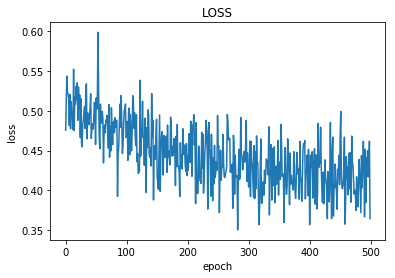

In [50]:
%matplotlib inline
plt.plot(range(len(loss_history)), loss_history)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('LOSS')
plt.show()

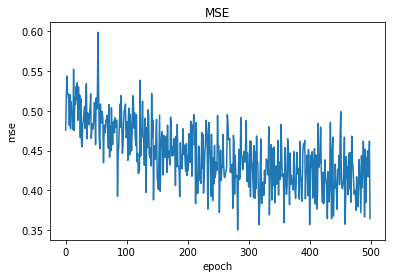

In [51]:
%matplotlib inline
plt.plot(range(len(mse_history)), mse_history)
plt.xlabel('epoch')
plt.ylabel('mse')
plt.title('MSE')
plt.show()

In [52]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

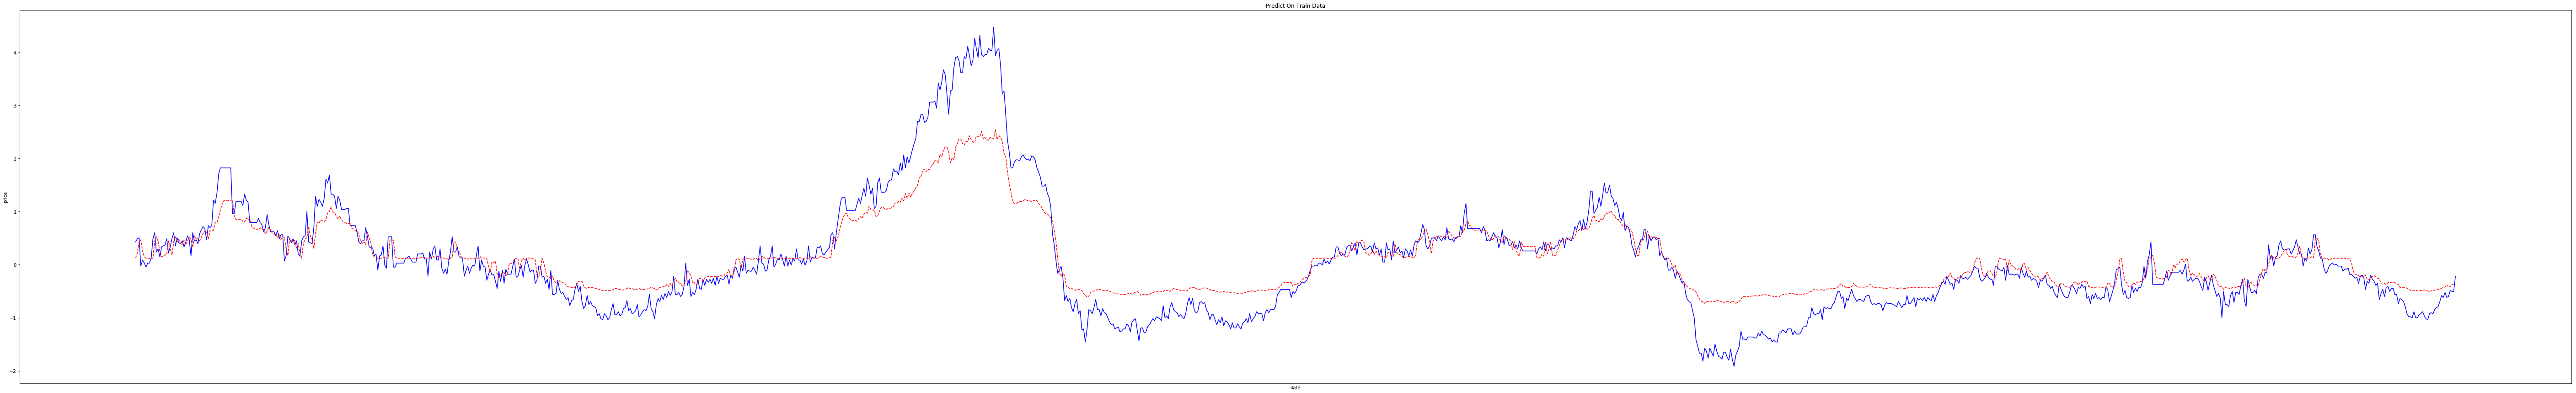

In [53]:
%matplotlib inline
plt.figure(figsize=(100, 15))
plt.plot(range(len(X_train)), y_train,'b')
plt.plot(range(len(X_train)), y_train_pred, 'r--')
plt.xlabel('date')
plt.xticks([])
plt.ylabel('price')
plt.title('Predict On Train Data')
plt.show()

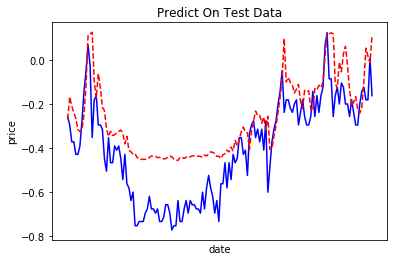

In [54]:
%matplotlib inline
plt.plot(range(len(X_test)), y_test,'b')
plt.plot(range(len(X_test)), y_test_pred, 'r--')
plt.xlabel('date')
plt.xticks([])
plt.ylabel('price')
plt.title('Predict On Test Data')
plt.show()

## 2.5 更改激活函数及Early_stopping

### 2.5.1 模型的定义

In [29]:
def build_network_4():
    network = Sequential()
    network.add(Dense(15, activation='tanh', input_dim=X_train.shape[1]))
    network.add(Dropout(0.4))
    network.add(Dense(10, activation='tanh'))
    network.add(Dropout(0.3))
    network.add(Dense(10, activation='tanh'))
    network.add(Dropout(0.3))
    network.add(Dense(1))
    network.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
    return network

In [30]:
model = build_network_4()

### 2.5.2 开始训练

In [31]:
best_weights_filepath = './model_data/nn4_best.hdf5'
tensorboad = TensorBoard(log_dir='./model_data_2/log')
early_stopping = EarlyStopping(
    monitor='val_loss', patience=100, verbose=2, mode='auto')
save_bestModel = ModelCheckpoint(
    best_weights_filepath,
    monitor='val_loss',
    verbose=2,
    save_best_only=True,
    mode='auto')

In [32]:
history = model.fit(
    X_train,
    y_train,
    epochs=500,
    shuffle=True,
    batch_size=100,
    verbose=1,
    validation_split=0.1,
    callbacks=[save_bestModel,early_stopping,tensorboad])

Train on 1207 samples, validate on 135 samples
Epoch 1/500
1207/1207 [==============================] - 1s 521us/step - loss: 1.9692 - mean_absolute_error: 1.0747 - mean_squared_error: 1.9692 - val_loss: 0.5007 - val_mean_absolute_error: 0.6040 - val_mean_squared_error: 0.5007

Epoch 00001: val_loss improved from inf to 0.50068, saving model to ./model_data_2/nn4_best.hdf5
Epoch 2/500
1207/1207 [==============================] - 0s 36us/step - loss: 1.4812 - mean_absolute_error: 0.9134 - mean_squared_error: 1.4812 - val_loss: 0.2550 - val_mean_absolute_error: 0.4318 - val_mean_squared_error: 0.2550

Epoch 00002: val_loss improved from 0.50068 to 0.25503, saving model to ./model_data_2/nn4_best.hdf5
Epoch 3/500
1207/1207 [==============================] - 0s 23us/step - loss: 1.1389 - mean_absolute_error: 0.8000 - mean_squared_error: 1.1389 - val_loss: 0.1264 - val_mean_absolute_error: 0.3008 - val_mean_squared_error: 0.1264

Epoch 00003: val_loss improved from 0.25503 to 0.12644, savin


Epoch 00028: val_loss did not improve from 0.02955
Epoch 29/500
1207/1207 [==============================] - 0s 19us/step - loss: 0.4223 - mean_absolute_error: 0.4616 - mean_squared_error: 0.4223 - val_loss: 0.0450 - val_mean_absolute_error: 0.1642 - val_mean_squared_error: 0.0450

Epoch 00029: val_loss did not improve from 0.02955
Epoch 30/500
1207/1207 [==============================] - 0s 24us/step - loss: 0.4090 - mean_absolute_error: 0.4590 - mean_squared_error: 0.4090 - val_loss: 0.0459 - val_mean_absolute_error: 0.1666 - val_mean_squared_error: 0.0459

Epoch 00030: val_loss did not improve from 0.02955
Epoch 31/500
1207/1207 [==============================] - 0s 19us/step - loss: 0.4414 - mean_absolute_error: 0.4628 - mean_squared_error: 0.4414 - val_loss: 0.0496 - val_mean_absolute_error: 0.1745 - val_mean_squared_error: 0.0496

Epoch 00031: val_loss did not improve from 0.02955
Epoch 32/500
1207/1207 [==============================] - 0s 23us/step - loss: 0.4342 - mean_absolu


Epoch 00057: val_loss did not improve from 0.02955
Epoch 58/500
1207/1207 [==============================] - 0s 31us/step - loss: 0.3326 - mean_absolute_error: 0.4097 - mean_squared_error: 0.3326 - val_loss: 0.0388 - val_mean_absolute_error: 0.1497 - val_mean_squared_error: 0.0388

Epoch 00058: val_loss did not improve from 0.02955
Epoch 59/500
1207/1207 [==============================] - 0s 33us/step - loss: 0.3596 - mean_absolute_error: 0.4173 - mean_squared_error: 0.3596 - val_loss: 0.0425 - val_mean_absolute_error: 0.1574 - val_mean_squared_error: 0.0425

Epoch 00059: val_loss did not improve from 0.02955
Epoch 60/500
1207/1207 [==============================] - 0s 33us/step - loss: 0.3308 - mean_absolute_error: 0.4042 - mean_squared_error: 0.3308 - val_loss: 0.0400 - val_mean_absolute_error: 0.1512 - val_mean_squared_error: 0.0400

Epoch 00060: val_loss did not improve from 0.02955
Epoch 61/500
1207/1207 [==============================] - 0s 27us/step - loss: 0.3351 - mean_absolu


Epoch 00086: val_loss did not improve from 0.02861
Epoch 87/500
1207/1207 [==============================] - 0s 29us/step - loss: 0.2678 - mean_absolute_error: 0.3655 - mean_squared_error: 0.2678 - val_loss: 0.0299 - val_mean_absolute_error: 0.1284 - val_mean_squared_error: 0.0299

Epoch 00087: val_loss did not improve from 0.02861
Epoch 88/500
1207/1207 [==============================] - 0s 34us/step - loss: 0.2768 - mean_absolute_error: 0.3659 - mean_squared_error: 0.2768 - val_loss: 0.0319 - val_mean_absolute_error: 0.1349 - val_mean_squared_error: 0.0319

Epoch 00088: val_loss did not improve from 0.02861
Epoch 89/500
1207/1207 [==============================] - 0s 29us/step - loss: 0.2673 - mean_absolute_error: 0.3689 - mean_squared_error: 0.2673 - val_loss: 0.0289 - val_mean_absolute_error: 0.1255 - val_mean_squared_error: 0.0289

Epoch 00089: val_loss did not improve from 0.02861
Epoch 90/500
1207/1207 [==============================] - 0s 23us/step - loss: 0.2510 - mean_absolu


Epoch 00114: val_loss did not improve from 0.02319
Epoch 115/500
1207/1207 [==============================] - 0s 21us/step - loss: 0.2131 - mean_absolute_error: 0.3246 - mean_squared_error: 0.2131 - val_loss: 0.0272 - val_mean_absolute_error: 0.1234 - val_mean_squared_error: 0.0272

Epoch 00115: val_loss did not improve from 0.02319
Epoch 116/500
1207/1207 [==============================] - 0s 19us/step - loss: 0.2414 - mean_absolute_error: 0.3449 - mean_squared_error: 0.2414 - val_loss: 0.0273 - val_mean_absolute_error: 0.1249 - val_mean_squared_error: 0.0273

Epoch 00116: val_loss did not improve from 0.02319
Epoch 117/500
1207/1207 [==============================] - 0s 23us/step - loss: 0.2257 - mean_absolute_error: 0.3319 - mean_squared_error: 0.2257 - val_loss: 0.0258 - val_mean_absolute_error: 0.1230 - val_mean_squared_error: 0.0258

Epoch 00117: val_loss did not improve from 0.02319
Epoch 118/500
1207/1207 [==============================] - 0s 24us/step - loss: 0.1991 - mean_ab


Epoch 00171: val_loss did not improve from 0.02131
Epoch 172/500
1207/1207 [==============================] - 0s 28us/step - loss: 0.2092 - mean_absolute_error: 0.3195 - mean_squared_error: 0.2092 - val_loss: 0.0303 - val_mean_absolute_error: 0.1385 - val_mean_squared_error: 0.0303

Epoch 00172: val_loss did not improve from 0.02131
Epoch 173/500
1207/1207 [==============================] - 0s 30us/step - loss: 0.1956 - mean_absolute_error: 0.3093 - mean_squared_error: 0.1956 - val_loss: 0.0313 - val_mean_absolute_error: 0.1409 - val_mean_squared_error: 0.0313

Epoch 00173: val_loss did not improve from 0.02131
Epoch 174/500
1207/1207 [==============================] - 0s 30us/step - loss: 0.1908 - mean_absolute_error: 0.2968 - mean_squared_error: 0.1908 - val_loss: 0.0277 - val_mean_absolute_error: 0.1253 - val_mean_squared_error: 0.0277

Epoch 00174: val_loss did not improve from 0.02131
Epoch 175/500
1207/1207 [==============================] - 0s 29us/step - loss: 0.1864 - mean_ab

Epoch 229/500
1207/1207 [==============================] - 0s 25us/step - loss: 0.1753 - mean_absolute_error: 0.2890 - mean_squared_error: 0.1753 - val_loss: 0.0291 - val_mean_absolute_error: 0.1352 - val_mean_squared_error: 0.0291

Epoch 00229: val_loss did not improve from 0.01998
Epoch 230/500
1207/1207 [==============================] - 0s 27us/step - loss: 0.1677 - mean_absolute_error: 0.2928 - mean_squared_error: 0.1677 - val_loss: 0.0267 - val_mean_absolute_error: 0.1279 - val_mean_squared_error: 0.0267

Epoch 00230: val_loss did not improve from 0.01998
Epoch 231/500
1207/1207 [==============================] - 0s 25us/step - loss: 0.1682 - mean_absolute_error: 0.2841 - mean_squared_error: 0.1682 - val_loss: 0.0260 - val_mean_absolute_error: 0.1259 - val_mean_squared_error: 0.0260

Epoch 00231: val_loss did not improve from 0.01998
Epoch 232/500
1207/1207 [==============================] - 0s 25us/step - loss: 0.1846 - mean_absolute_error: 0.2964 - mean_squared_error: 0.1846 - 

1207/1207 [==============================] - 0s 24us/step - loss: 0.1579 - mean_absolute_error: 0.2841 - mean_squared_error: 0.1579 - val_loss: 0.0277 - val_mean_absolute_error: 0.1333 - val_mean_squared_error: 0.0277

Epoch 00258: val_loss did not improve from 0.01998
Epoch 259/500
1207/1207 [==============================] - 0s 23us/step - loss: 0.1694 - mean_absolute_error: 0.2875 - mean_squared_error: 0.1694 - val_loss: 0.0221 - val_mean_absolute_error: 0.1084 - val_mean_squared_error: 0.0221

Epoch 00259: val_loss did not improve from 0.01998
Epoch 260/500
1207/1207 [==============================] - 0s 22us/step - loss: 0.1794 - mean_absolute_error: 0.2901 - mean_squared_error: 0.1794 - val_loss: 0.0247 - val_mean_absolute_error: 0.1196 - val_mean_squared_error: 0.0247

Epoch 00260: val_loss did not improve from 0.01998
Epoch 261/500
1207/1207 [==============================] - 0s 25us/step - loss: 0.1833 - mean_absolute_error: 0.2921 - mean_squared_error: 0.1833 - val_loss: 0.02

### 2.5.3 分析模型

In [33]:
loss_history = history.history['loss']
mae_history = history.history['mean_absolute_error']
mse_history = history.history['mean_squared_error']

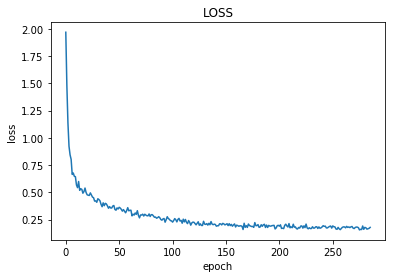

In [34]:
%matplotlib inline
plt.plot(range(len(loss_history)), loss_history)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('LOSS')
plt.show()

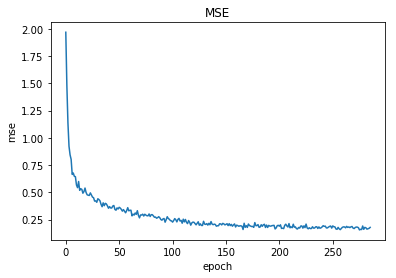

In [35]:
%matplotlib inline
plt.plot(range(len(mse_history)), mse_history)
plt.xlabel('epoch')
plt.ylabel('mse')
plt.title('MSE')
plt.show()

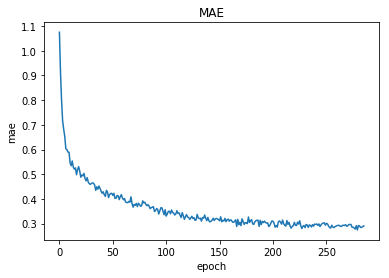

In [36]:
%matplotlib inline
plt.plot(range(len(mae_history)), mae_history)
plt.xlabel('epoch')
plt.ylabel('mae')
plt.title('MAE')
plt.show()

In [37]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

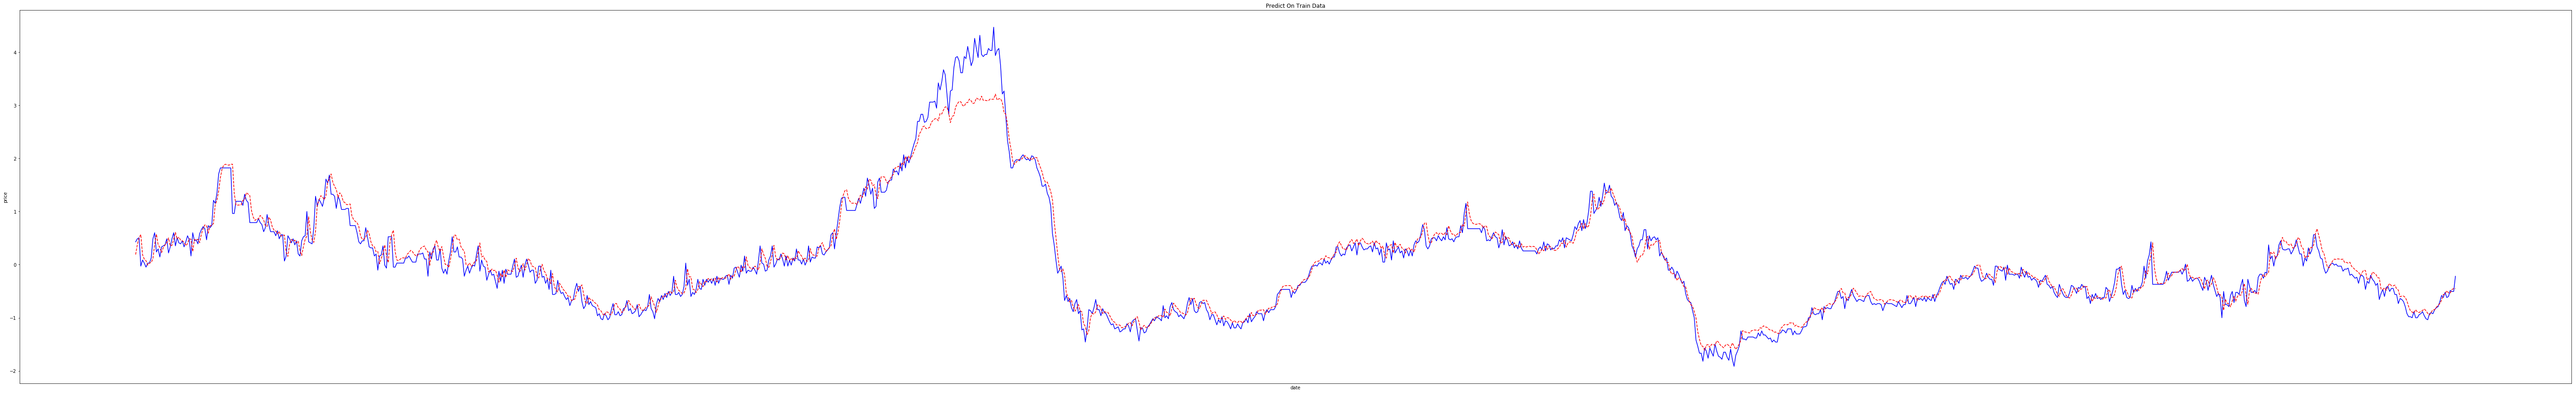

In [38]:
%matplotlib inline
plt.figure(figsize=(100, 15))
plt.plot(range(len(X_train)), y_train,'b')
plt.plot(range(len(X_train)), y_train_pred, 'r--')
plt.xlabel('date')
plt.xticks([])
plt.ylabel('price')
plt.title('Predict On Train Data')
plt.show()

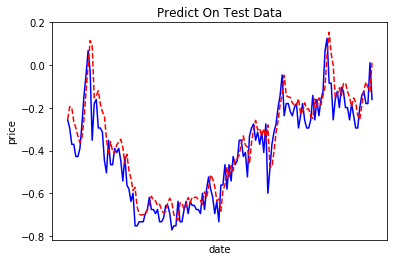

In [39]:
%matplotlib inline
plt.plot(range(len(X_test)), y_test,'b')
plt.plot(range(len(X_test)), y_test_pred, 'r--')
plt.xlabel('date')
plt.xticks([])
plt.ylabel('price')
plt.title('Predict On Test Data')
plt.show()

In [40]:
loss_value, mae_value,mse_value = model.evaluate(x=X_test, y=y_test,verbose=1) 
print(loss_value)
print(mae_value)
print(mse_value)

150/150 [==============================] - 0s 55us/step
0.009572122258444627
0.07578775525093079
0.009572122258444627


# 3. 最佳模型的使用

In [1]:
from keras.models import load_model
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import optimizers
from keras.callbacks import EarlyStopping,ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
model = load_model('./best_model_tanh/model.hdf5')
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                105       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_______________________________________

In [3]:
df =  pd.read_csv('./data/dataset_wx_final.csv', index_col='date')
df = df.fillna(method='bfill')
df = df.fillna(df.mean())
X_data = df.iloc[:,0:-1]
Y_data = df['price'].values.reshape(-1, 1)
scaler_X = preprocessing.StandardScaler(
    copy=True, with_mean=True, with_std=True).fit(X_data)
scaler_Y =  preprocessing.StandardScaler(
    copy=True, with_mean=True, with_std=True).fit(Y_data)
X = scaler_X.transform(X_data)
Y = scaler_Y.transform(Y_data)
X_train = X[:1342]
y_train = Y[:1342]
X_test = X[1342:]
y_test = Y[1342:]


In [4]:
loss_value, mae_value,mse_value = model.evaluate(x=X_test, y=y_test,verbose=1) 

150/150 [==============================] - 0s 778us/step


In [5]:
loss_value

0.008305021934211254

In [6]:
mae_value

0.07005529751380285

In [7]:
mse_value

0.008305021934211254

In [8]:
y_test_pred = model.predict(X_test)

In [9]:
X_pr = scaler_X.inverse_transform(X_test)

In [10]:
y_predict = scaler_Y.inverse_transform(y_test_pred)
y_true = scaler_Y.inverse_transform(y_test)

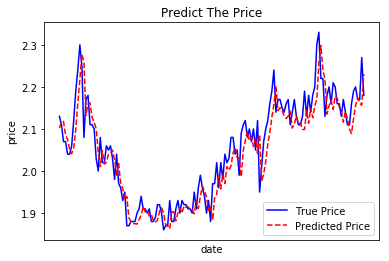

In [11]:
%matplotlib inline
L1= plt.plot(range(len(X_pr)), y_true,'b', label = 'True Price')
L2 = plt.plot(range(len(X_pr)), y_predict, 'r--', label = 'Predicted Price')
plt.xlabel('date')
plt.xticks([])
plt.ylabel('price')
plt.title('Predict The Price')
plt.legend(loc='best')
plt.show()

In [12]:
import numpy as np
test = np.array([[2.65, 2.65, 2.64, 2.6, 2.5, 618.0]])
print(test.shape)
print(test)

(1, 6)
[[  2.65   2.65   2.64   2.6    2.5  618.  ]]


In [13]:
test_X = scaler_X.transform(test)
test_X

array([[ 0.73398504,  0.73402541,  0.71369302,  0.63032965,  0.22345831,
        -1.44323845]])

In [14]:
test_y = model.predict(test_X)
test_y

array([[0.8384018]], dtype=float32)

In [15]:
y = scaler_Y.inverse_transform(test_y)
y

array([[2.7042909]], dtype=float32)

In [26]:
%matplotlib inline

In [27]:
y_index = [i for i in range(len(y_true))]

In [28]:
from pyecharts import Line
line = Line()
line.add("预测",y_index, y_true.flatten())

# 数据展示

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df =  pd.read_csv('./data/dataset_wx_web.csv', index_col='date')

In [4]:
Y_data = df['price'].values.reshape(-1, 1)

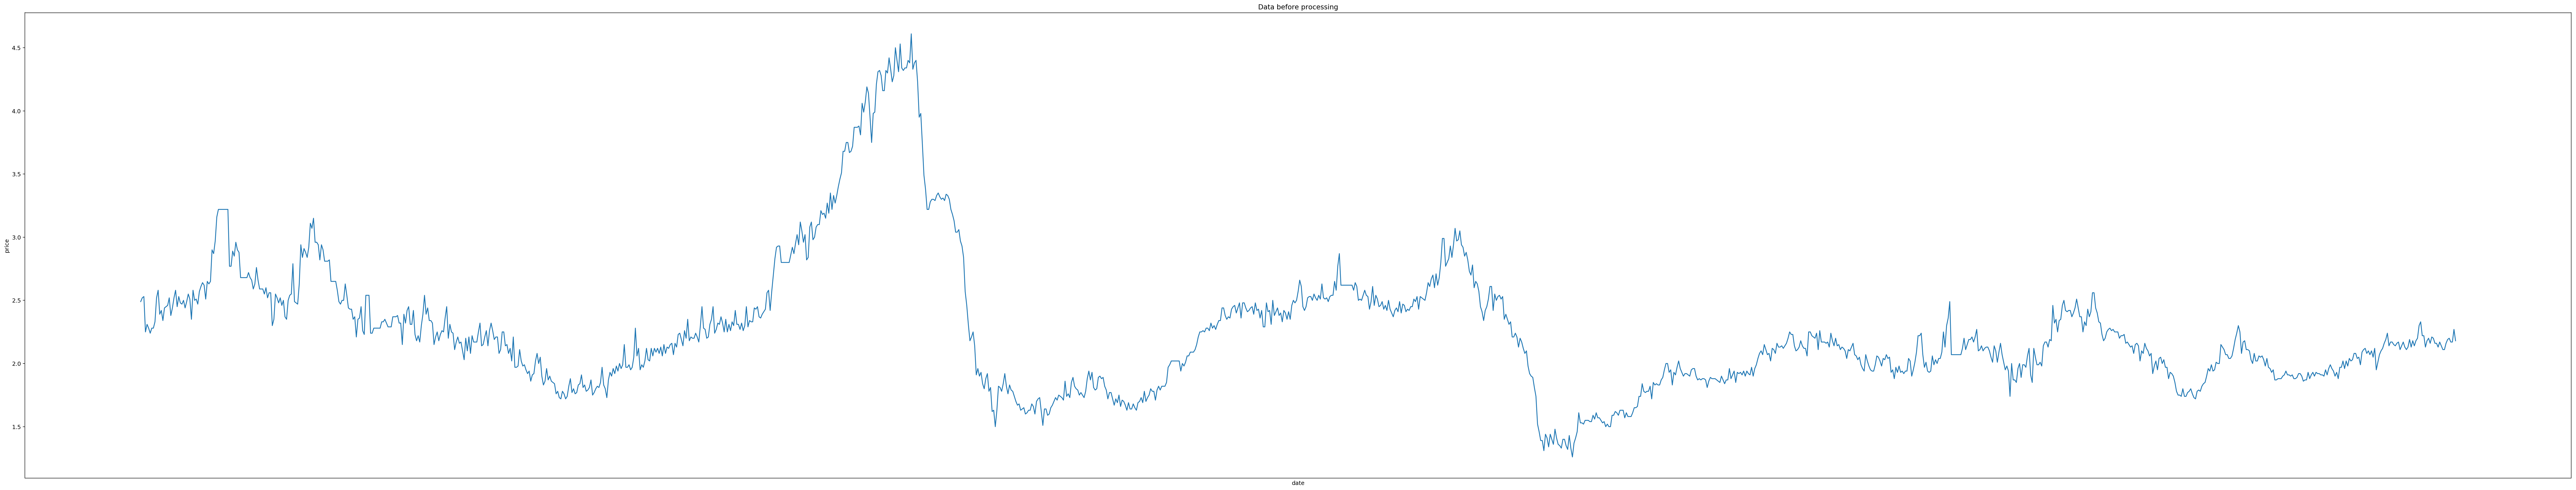

In [10]:
plt.figure(figsize=(80, 15),dpi = 180)
plt.plot(range(len(Y_data)), Y_data)
plt.xlabel('date')
plt.xticks([])
plt.ylabel('price')
plt.title('Data before processing')
plt.savefig('./price_data.jpg')
plt.show()